# Data

0 : will repay loan on time)

1 : will have difficulty repaying loan)

## Imports

In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# File system manangement
import os
import time
import joblib

# Suppress warnings 
import warnings
# warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, fbeta_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, make_scorer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Features explanations
import lime
import lime.lime_tabular
from lime import submodular_pick
import shap

# API deployement
import sklearn.pipeline as pipeline
from sklearn.pipeline import FeatureUnion
import mlflow
import streamlit

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X,y = None):
        return X[self.attribute_names].values

In [3]:
start_notebook = time.time()

## Read in Data

In [4]:
# List files available
print(os.listdir(r"C:\Users\Jeff\Desktop\2021\Openclassroom\P7_tahiata_jeff"))

['.ipynb_checkpoints', '.~lock.P7_02_presentation.odp#', '.~lock.P7_03_note_methodologique.odt#', 'api.py', 'application_test.csv', 'application_train.csv', 'autres', 'balanced_random_forest.csv', 'balanced_random_forest_domain.csv', 'balanced_random_forest_engineered.csv', 'bureau.csv', 'bureau_balance.csv', 'corrigé_deploy_ml_api', 'corrigé_deploy_ml_api.zip', 'credit_card_balance.csv', 'Credit_default_risk-master', 'customer_features.csv', 'dashboard.py', 'datacamp', 'distribution_target.png', 'functions', 'Github', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'lgbm_importances01.png', 'liens', 'loan_model.joblib', 'log_reg_baseline.csv', 'mlflow_components.JPG', 'mlflow_tracking.JPG', 'mlflow_tracking_tutorial', 'mlruns', 'outputs', 'P7_01_dashboard.ipynb', 'P7_02_presentation.odp', 'P7_03_note_methodologique.odt', 'P7_tahiata_jeff_A', 'P7_tahiata_jeff_A - Copie', 'P7_tahiata_jeff_B', 'POS_CASH_balance.csv', 'previous_application.csv', 'projects', 'random_fo

In [5]:
# Training data
app_train = pd.read_csv(r"C:\Users\Jeff\Desktop\2021\Openclassroom\P7_tahiata_jeff\application_train.csv")
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Liste colonnes catégoriques
print(app_train.dtypes.unique())

cat_columns = []
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        cat_columns.append(col)
        
        
# Liste colonnes numériques
num_columns = app_train.columns[~app_train.columns.isin(cat_columns)].tolist()

[dtype('int64') dtype('O') dtype('float64')]


In [7]:
# Testing data features
app_test = pd.read_csv(r"C:\Users\Jeff\Desktop\2021\Openclassroom\P7_tahiata_jeff\application_test.csv")
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

## Examine the Distribution of the Target Column

In [8]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

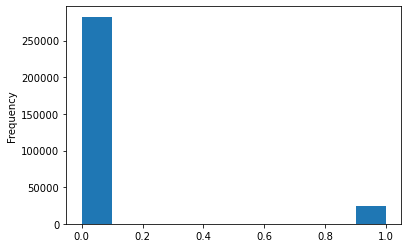

In [9]:
app_train['TARGET'].astype(int).plot.hist();

## Examine Missing Values

In [10]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


## Column Types

In [12]:
# Number of each type of column
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [13]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [14]:
# import csv

# with open('customer_features.csv', 'w') as f:
      
#     # using csv.writer method from CSV package
#     write = csv.writer(f)
#     write.writerow(app_train.drop(columns=['SK_ID_CURR','TARGET']).columns.tolist())

## Encoding Categorical Variables : Label Encoding and One-hot Encoding

In [14]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [15]:
app_train_columns = app_train.columns
app_test_columns = app_test.columns

In [16]:
# one-hot encoding of categorical variables
# Convert categorical variable into dummy/indicator variable
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [17]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


## Anomalies

In [18]:
(app_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [19]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

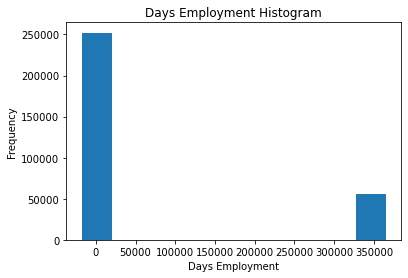

In [20]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [21]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


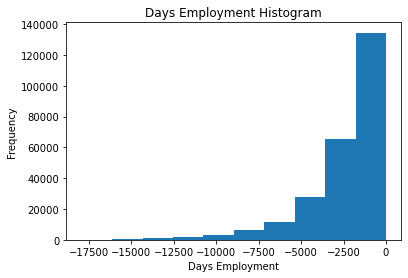

In [22]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [23]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


## Correlations

In [24]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

In [25]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982712

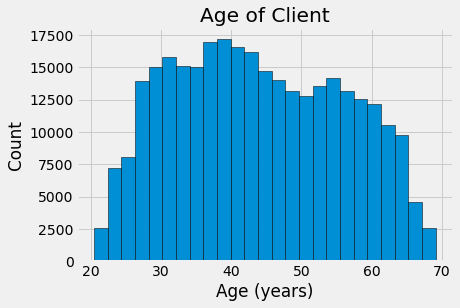

In [26]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

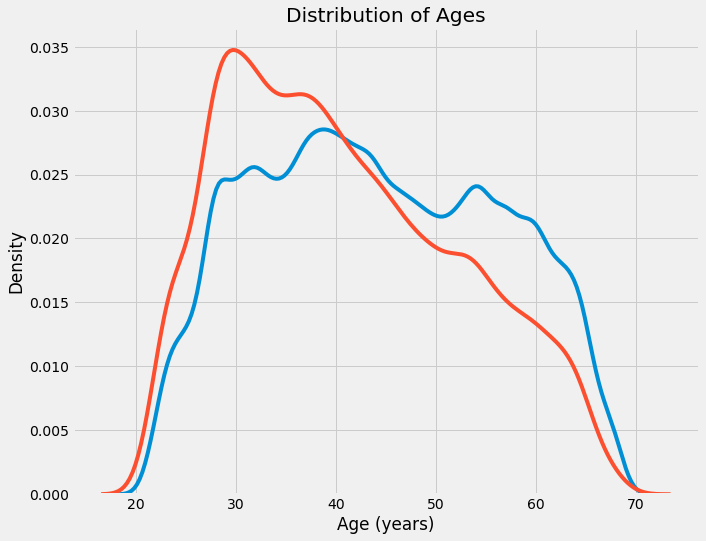

In [27]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [28]:
# Age information into a separate dataframe
age_data = app_train.loc[:,['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data.loc[:,'DAYS_BIRTH'] / 365

# Bin the age data
age_data.loc[:,'YEARS_BINNED'] = pd.cut(age_data.loc[:,'YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [29]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


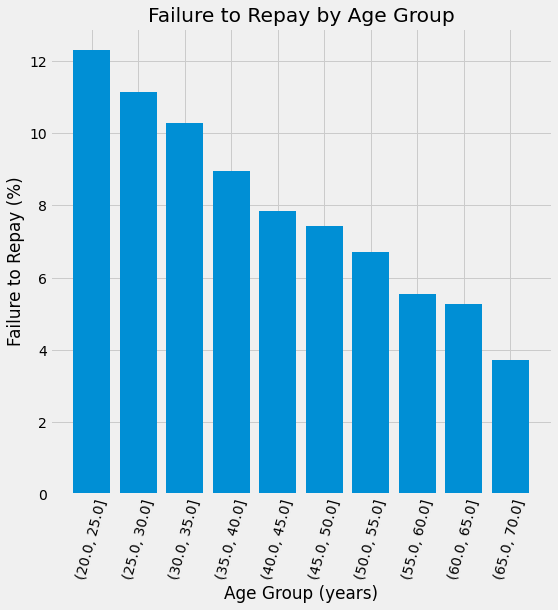

In [30]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

## EXT_SOURCE

Les 3 variables avec les corrélations négatives les plus fortes avec la cible sont EXT_SOURCE_1, EXT_SOURCE_2 et EXT_SOURCE_3. Selon la documentation, ces caractéristiques représentent un "score normalisé à partir d'une source de données externe". On ne sais pas exactement ce que cela signifie, mais il peut s'agir d'une sorte de score de crédit cumulative établie à l'aide de nombreuses sources de données.

In [31]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


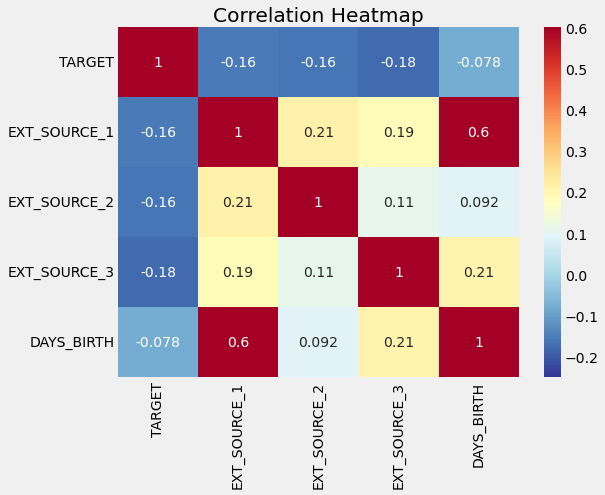

In [32]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

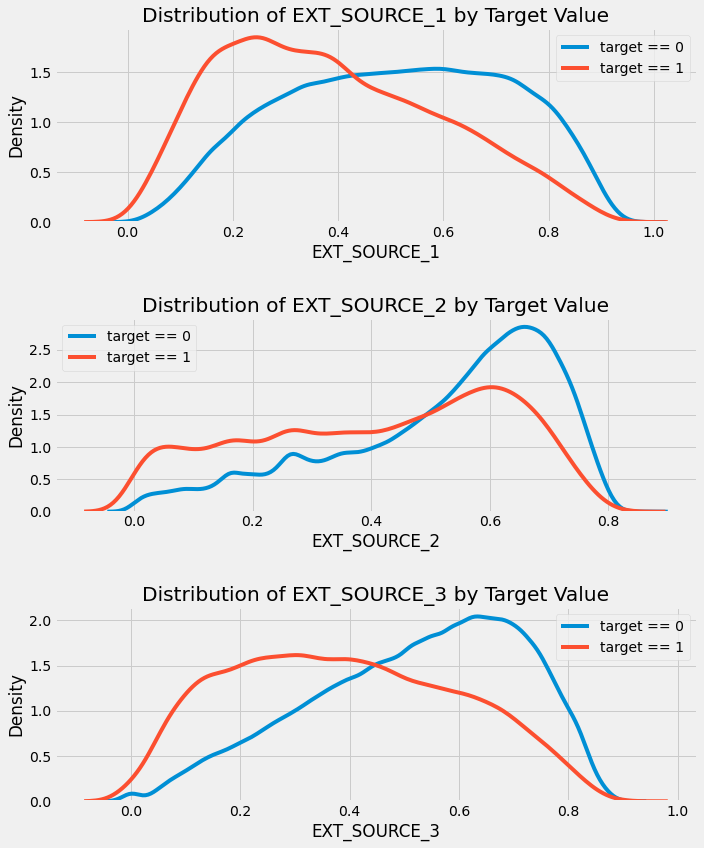

In [33]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.legend();
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

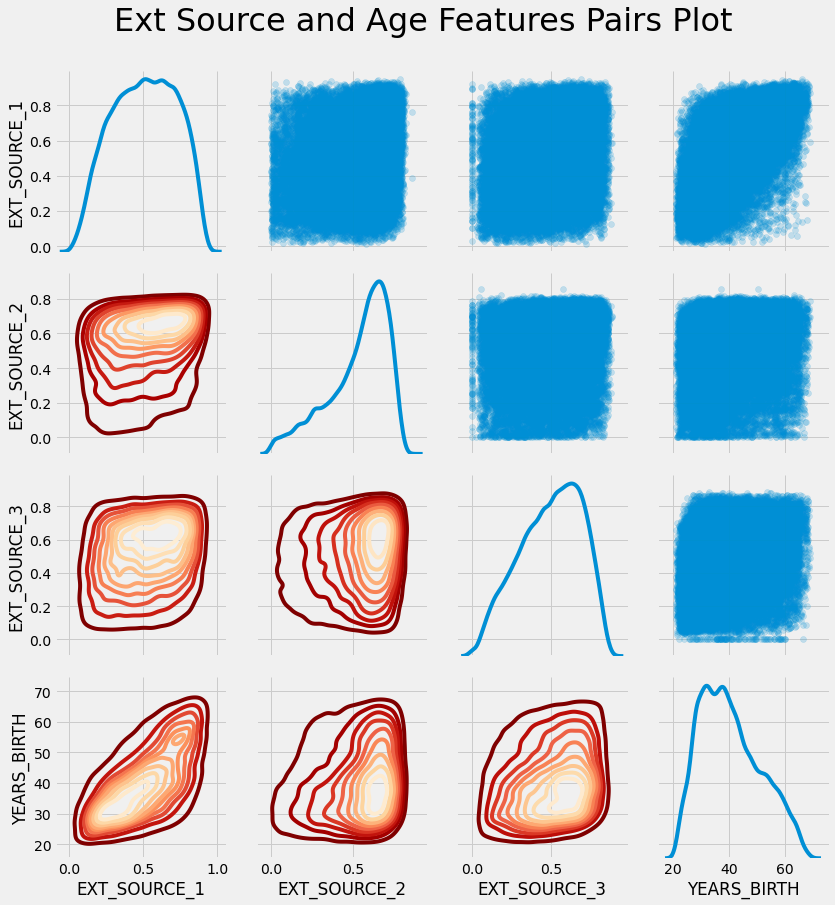

In [34]:
# Copy the data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, height = 3, diag_sharey=False,
#                     hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

Dans ce graphique, le rouge indique les prêts qui n'ont pas été remboursés et le bleu les prêts qui sont payés.
Nous pouvons voir les différentes relations au sein des données. Il semble y avoir une relation linéaire positive
modérée entre EXT_SOURCE_1 et DAYS_BIRTH (ou de manière équivalente YEARS_BIRTH), indiquant que cette caractéristique
peut prendre en compte l'âge du client.

# Feature Engineering

## Polynomial Features

In [35]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [36]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


In [37]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

In [38]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [39]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 275)
Testing data with polynomial features shape:   (48744, 275)


## Domain Knowledge Features

In [40]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [41]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

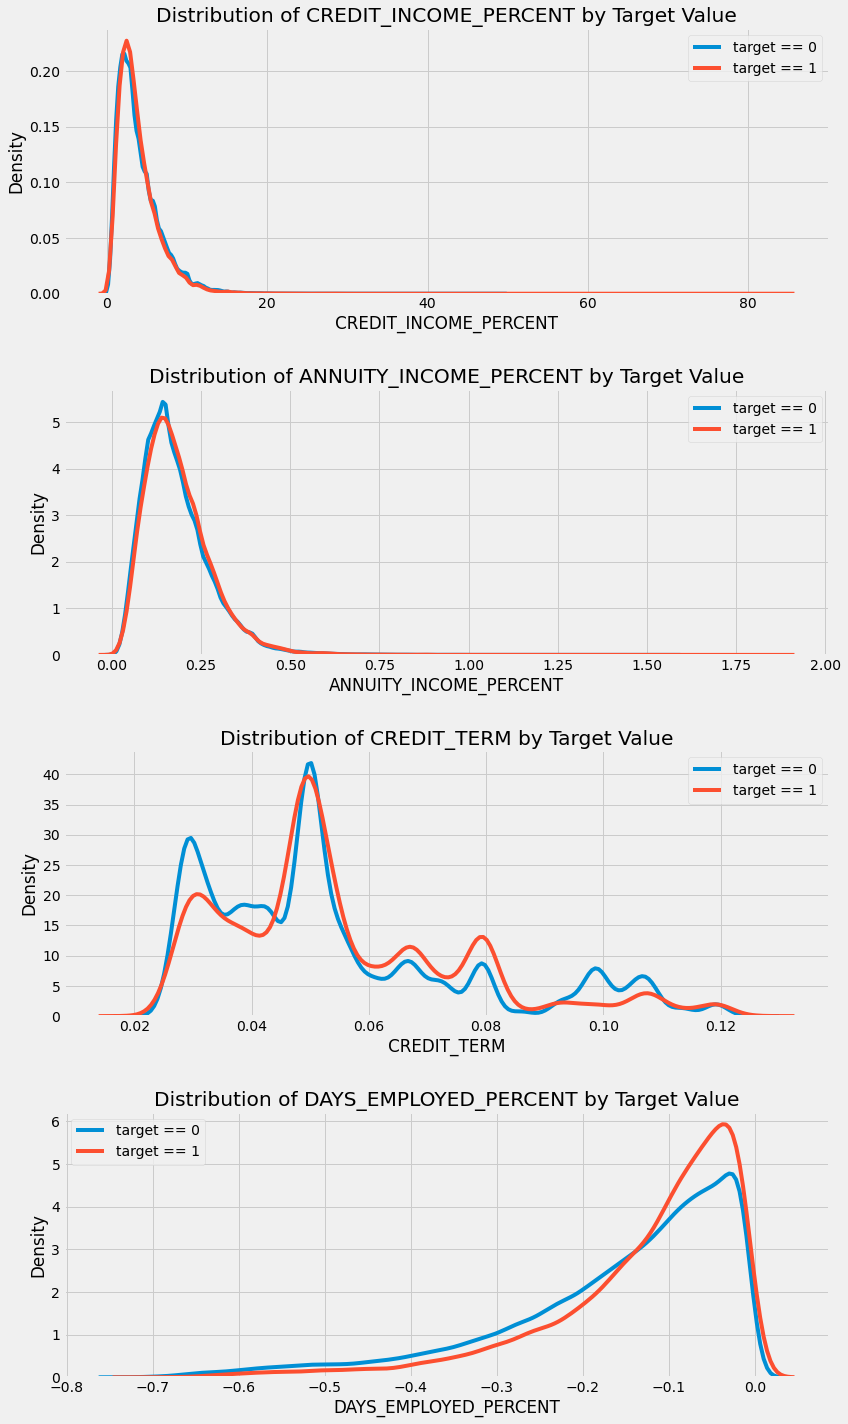

In [42]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.legend()
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

# Imputer and scaler

## Original features

In [43]:
# Drop the target from the training/test data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()

if 'TARGET' in app_test:
    test = app_test.drop(columns = ['TARGET'])
else:
    test = app_test.copy()
    
if 'SK_ID_CURR' in train:
    train = train.drop(columns = ['SK_ID_CURR'])
else:
    train = train.copy()

if 'SK_ID_CURR' in test:
    test = test.drop(columns = ['SK_ID_CURR'])
else:
    test = test.copy()

In [44]:
# Feature names
features_original = app_train_columns.drop(['TARGET','SK_ID_CURR'])

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')
imputer.fit(train)

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

# Repeat with the scaler
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

X does not have valid feature names, but MinMaxScaler was fitted with feature names


Training data shape:  (307511, 239)
Testing data shape:  (48744, 239)


X does not have valid feature names, but MinMaxScaler was fitted with feature names


In [45]:
# Feature transformed names
features = app_train.columns.drop(['TARGET','SK_ID_CURR'])

## On engineered features

In [46]:
app_train_poly = app_train_poly.drop(columns = ['SK_ID_CURR'])
app_test_poly = app_test_poly.drop(columns = ['SK_ID_CURR'])

poly_features_names = list(app_train_poly.columns)

# Impute the polynomial features
imputer = SimpleImputer(strategy = 'median')

poly_features = imputer.fit_transform(app_train_poly)
poly_features_test = imputer.transform(app_test_poly)

# Scale the polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

## On domain features

In [47]:
app_train_domain = app_train_domain.drop(columns = ['TARGET'])

domain_features_names = list(app_train_domain.columns)

# Impute the domainnomial features
imputer = SimpleImputer(strategy = 'median')

domain_features = imputer.fit_transform(app_train_domain)
domain_features_test = imputer.transform(app_test_domain)

# Scale the domainnomial features
scaler = MinMaxScaler(feature_range = (0, 1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

## Model Interpretation: Feature Importances

In [48]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better. 
    
    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance
        
    Returns:
        shows a plot of the 15 most importance features
        
        df (dataframe): feature importances sorted by importance (highest to lowest) 
        with a column for normalized importance
        """
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

Lorsque nous mesurons un classificateur selon le ROC AUC, nous ne générons pas de prédictions 0 ou 1, mais plutôt
une probabilité entre 0 et 1. Cela peut prêter à confusion car nous aimons généralement penser en termes de
précision, mais lorsque nous rencontrons des problèmes avec des classes déséquilibrées (nous verrons que c'est le
cas), la précision n'est pas la meilleure métrique. Par exemple, si je voulais construire un modèle capable de
détecter avec une précision de 99,9999%, je ferais simplement un modèle qui prédira chaque observation. De toute évidence, cela ne serait pas efficace (le rappel serait nul) et nous utilisons des métriques plus avancées telles que
ROC AUC ou le score F1 pour refléter plus précisément les performances d'un classificateur. Un modèle avec un ROC AUC
élevé aura également une grande précision, mais le ROC AUC est une meilleure représentation des performances du
modèle.

# Baseline

In [49]:
# Train-test split on train values
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(train), train_labels, test_size=0.3)

# Train-test split on polynomial values
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(pd.DataFrame(poly_features), train_labels, test_size=0.3)

# Train-test split on domain values
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(pd.DataFrame(domain_features), train_labels,
                                                            test_size=0.3)

In [50]:
# Scoring utilisé dans le GridSearch
ftwo_scorer = make_scorer(fbeta_score, beta=2)

In [51]:
# Fonction logistique
def logreg(X_train, y_train):
    start = time.time()
    param_grid = {"C":np.logspace(-3,3,7)}
    clf = GridSearchCV(
        LogisticRegression(solver='liblinear'),
        param_grid,
        scoring = ftwo_scorer,
        cv = 5
    )
    clf.fit(X_train, y_train)

    results_dict = {}
    results_dict['classifier_name'] = 'LogisticRegression'    
    results_dict['classifier'] = clf.best_estimator_
    results_dict['best_params'] = clf.best_params_
    results_dict['best_score_'] = clf.best_score_
#     results_dict['fbeta_score'] = fbeta_score(y_test, clf.predict(X_test), average='binary', beta=2)

    print('La regression logistique a mis',"%0.1f" % ((time.time() - start)/60),'minutes à se lancer')
    return results_dict

In [52]:
logreg_original = logreg(X_train, y_train)

La regression logistique a mis 19.4 minutes à se lancer


In [53]:
logreg_original

{'classifier_name': 'LogisticRegression',
 'classifier': LogisticRegression(C=1000.0, solver='liblinear'),
 'best_params': {'C': 1000.0},
 'best_score_': 0.01578631453468262}

In [54]:
# Fonction logistique
def ranfor(X_train, y_train):
    start = time.time()
    param_grid = {'n_estimators': [100, 500], 'criterion': ['gini', 'entropy'],
                  'max_features': ['auto'], 'max_depth' : [5, 7]}
    clf = GridSearchCV(
        RandomForestClassifier(random_state = 50, verbose = 0, n_jobs = -1),
        param_grid,
        scoring = ftwo_scorer,
        cv = 5    
    )
    clf.fit(X_train, y_train)

    results_dict = {}
    results_dict['classifier_name'] = 'RandomForestRegressor'    
    results_dict['classifier'] = clf.best_estimator_
    results_dict['best_params'] = clf.best_params_
    results_dict['fbeta_score'] = clf.best_score_

    print('Le RandomForestRegressor a mis',"%0.1f" % ((time.time() - start)/60),'minutes à se lancer')
    return results_dict

In [55]:
ranfor_original = ranfor(X_train, y_train)

Le RandomForestRegressor a mis 59.8 minutes à se lancer


In [56]:
ranfor_original

{'classifier_name': 'RandomForestRegressor',
 'classifier': RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=50),
 'best_params': {'criterion': 'gini',
  'max_depth': 5,
  'max_features': 'auto',
  'n_estimators': 100},
 'fbeta_score': 0.0}

# Balanced classification

## Random Forest Classifier implementation on original features

A balanced random forest randomly under-samples each boostrap sample to balance it.

fbeta_score : 0.39435583590289414


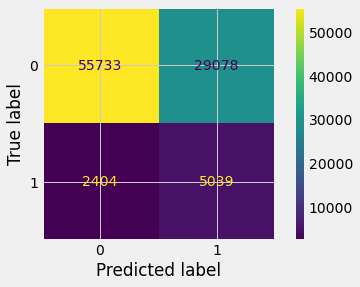

In [57]:
# Random forest on original features
brf = BalancedRandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 0, n_jobs = -1, max_depth=7,
                                      criterion='gini', max_features='auto')

# Training
brf.fit(X_train, y_train)

# Extract feature importances
feature_importance_values = brf.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
y_pred = brf.predict(X_test)

# The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its
# worst value at 0.
# beta = 2 car il donnera plus d'importance au rappel car il concerne les clients non solvables prédits solvables
print('fbeta_score :',fbeta_score(y_test, y_pred, average='binary', beta=2))

# Make a submission dataframe
submit = pd.DataFrame(app_train.iloc[X_test.index.tolist(),:]['SK_ID_CURR'], columns=['SK_ID_CURR'])
submit['TARGET'] = y_pred

# # Save the submission dataframe
# submit.to_csv('balanced_random_forest.csv', index = False)
# display(submit)

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

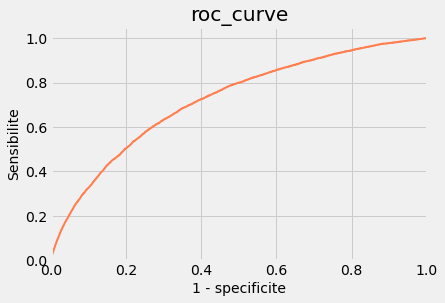

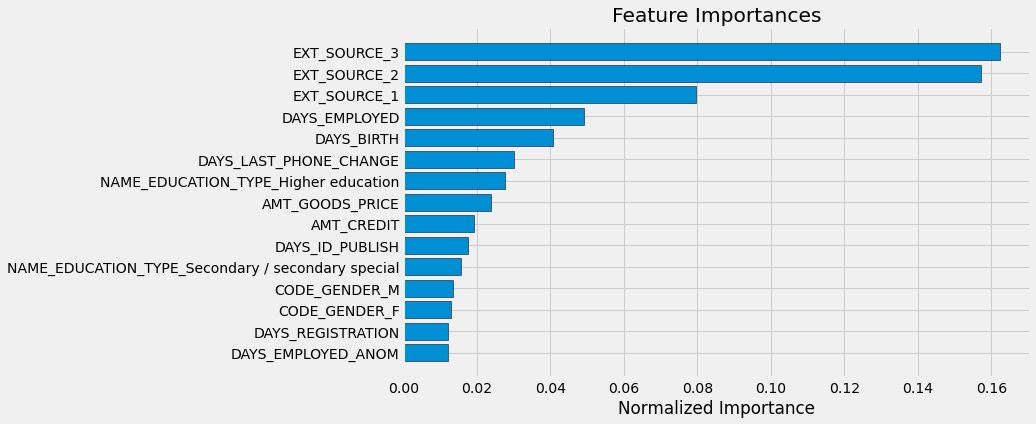

In [58]:
# Roc curve
[fpr, tpr, thr] = roc_curve(y_test, brf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14);
plt.ylabel('Sensibilite', fontsize=14);
plt.title('roc_curve');

# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

FN : solvable prédit solvable -> bonne prédiction +

TP : non solvable prédit non solvable -> bonne prédiction +

FP : solvable prédit non solvable -> mauvaise prédiction -

TN : non solvable prédit solvable -> mauvaise prédiction à éviter ------

## Engineered features

fbeta_score : 0.4000032408607726


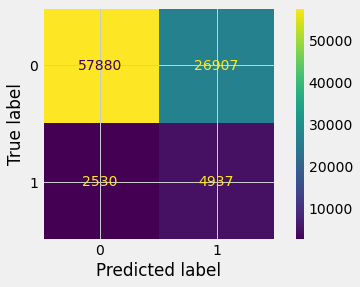

In [59]:
# Random forest on engineered features
brf.fit(X_train_p, y_train_p)

# Extract feature importances
feature_importance_values = brf.feature_importances_
feature_importances = pd.DataFrame({'feature': app_train_poly.columns, 'importance': feature_importance_values})

# Make predictions on the test data
y_pred_p = brf.predict(X_test_p)
print('fbeta_score :',fbeta_score(y_test_p, y_pred_p, average='binary', beta=2))

# Make a submission dataframe
submit = pd.DataFrame(app_train.iloc[X_test.index.tolist(),:]['SK_ID_CURR'], columns=['SK_ID_CURR'])
submit['TARGET'] = y_pred_p

# # Save the submission dataframe
# submit.to_csv('balanced_random_forest_engineered.csv', index = False)
# display(submit)

ConfusionMatrixDisplay.from_predictions(y_test_p, y_pred_p);

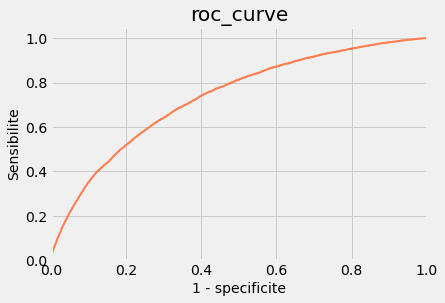

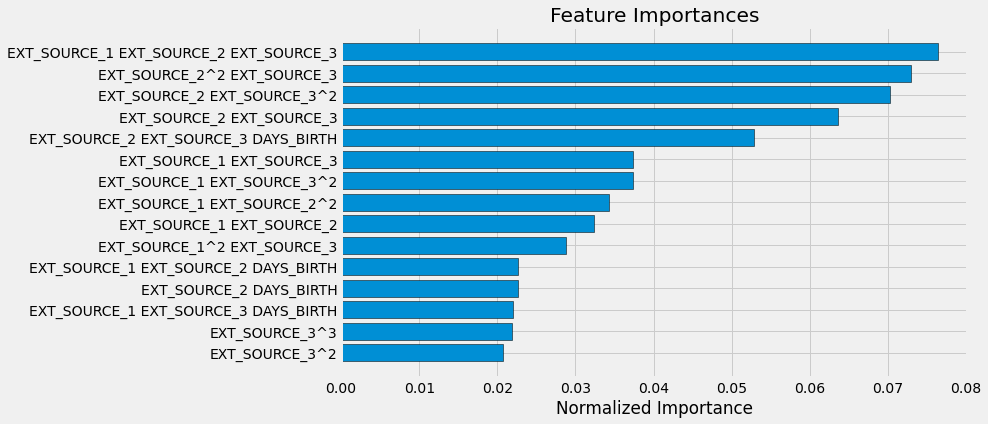

In [60]:
# Roc curve
[fpr, tpr, thr] = roc_curve(y_test_p, brf.predict_proba(X_test_p)[:,1])
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14);
plt.ylabel('Sensibilite', fontsize=14);
plt.title('roc_curve');

# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

## Testing Domain Features

fbeta_score : 0.39257490021319913


,SK_ID_CURR,TARGET
19239,122445,0
261730,402984,0
153798,278249,0
40228,146602,1
172908,300373,0
...,...,...
224133,359600,1
226712,362603,1
210191,343583,0
109019,226442,0


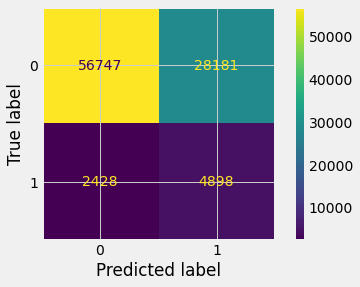

In [61]:
# Train on the training data
brf.fit(X_train_d, y_train_d)

# Extract feature importances
feature_importance_values_domain = brf.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

# Make predictions on the test data
y_pred_d = brf.predict(X_test_d)

print('fbeta_score :',fbeta_score(y_test_d, y_pred_d, average='binary', beta=2))

# Make a submission dataframe
submit = pd.DataFrame(app_train.iloc[X_test_d.index.tolist(),:]['SK_ID_CURR'], columns=['SK_ID_CURR'])
submit['TARGET'] = y_pred_d

# # Save the submission dataframe
# submit.to_csv('balanced_random_forest_domain.csv', index = False)

display(submit)
ConfusionMatrixDisplay.from_predictions(y_test_d, y_pred_d);

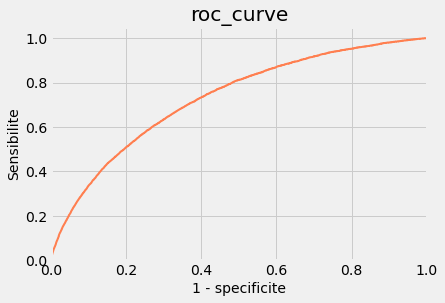

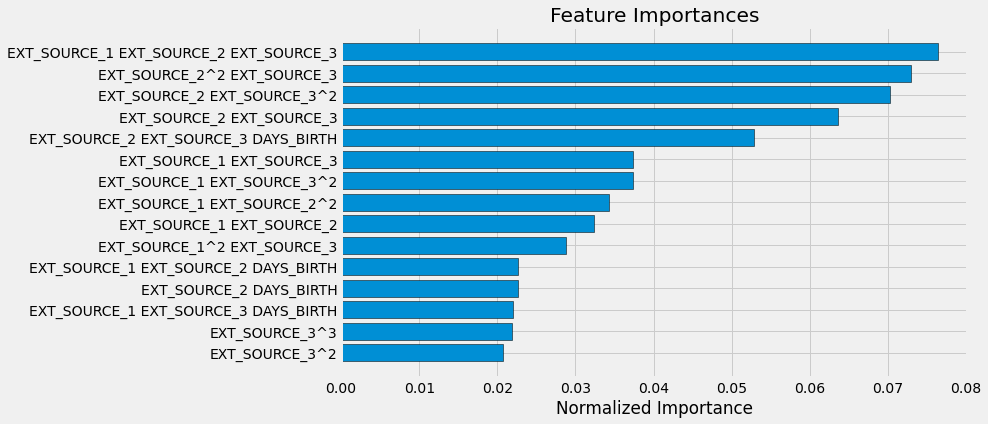

In [62]:
# Roc curve
[fpr, tpr, thr] = roc_curve(y_test_d, brf.predict_proba(X_test_d)[:,1])
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14);
plt.ylabel('Sensibilite', fontsize=14);
plt.title('roc_curve');

# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

# Resampling

Pour rééquilibrer les 2 classes étudiées, on rééchantillonne labels et features associées de façon à obtenir autant de labels 0 que 1

## Oversampling

In [63]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=55)

# Original features
X_ros, y_ros = ros.fit_resample(train, train_labels)

# Polynomial features
X_ros_p, y_ros_p = ros.fit_resample(poly_features, poly_target)

# Domain features
X_ros_d, y_ros_d = ros.fit_resample(domain_features, train_labels)

In [64]:
train.shape

(307511, 239)

### Original features

fbeta_score : 0.6886283594837773


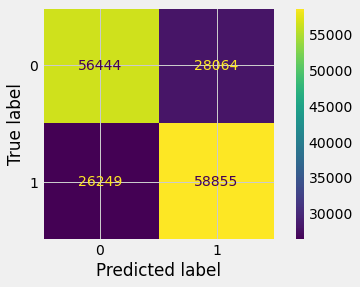

In [65]:
# Train-test split on train values
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.3)

rfc = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 0, n_jobs = -1, max_depth=7,
                                      criterion='gini', max_features='auto')

# Train on the training data
rfc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Extract feature importances
feature_importance_values = rfc.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

print('fbeta_score :',fbeta_score(y_test, y_pred, average='binary', beta=2))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

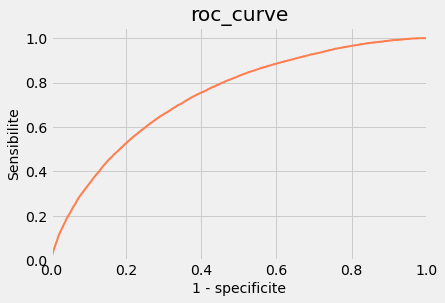

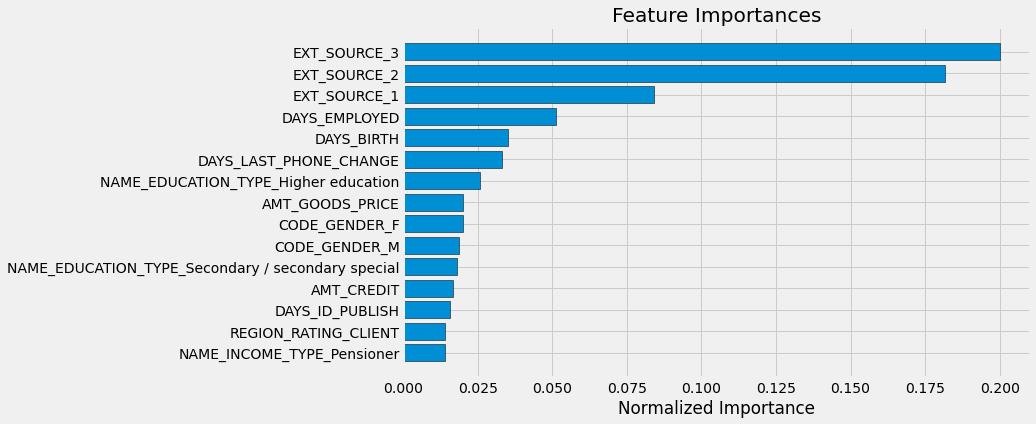

In [66]:
# Roc curve
[fpr, tpr, thr] = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14);
plt.ylabel('Sensibilite', fontsize=14);
plt.title('roc_curve');

# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

### Engineered features

fbeta_score : 0.6769114735551995


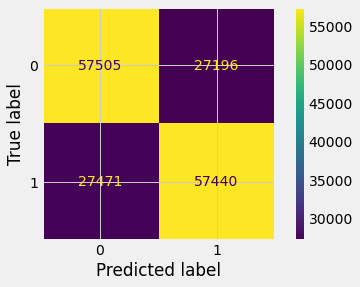

In [67]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_ros_p, y_ros_p, test_size=0.3)

# Train on the training data
rfc.fit(X_train_p, y_train_p)
      
# Make predictions on the test data
y_pred_p = rfc.predict(X_test_p)

# Extract feature importances
feature_importance_values = rfc.feature_importances_
feature_importances = pd.DataFrame({'feature': app_train_poly.columns, 'importance': feature_importance_values})

print('fbeta_score :',fbeta_score(y_test_p, y_pred_p, average='binary', beta=2))

ConfusionMatrixDisplay.from_predictions(y_test_p, y_pred_p);

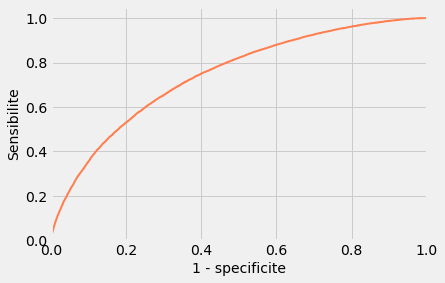

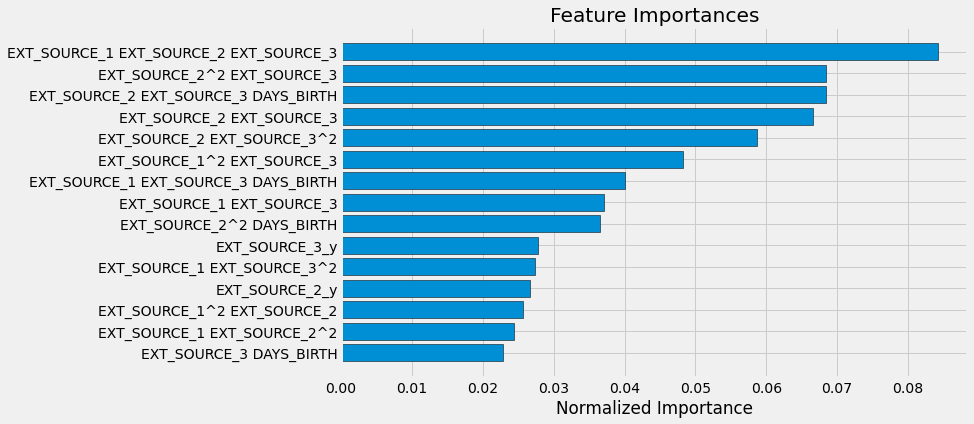

In [68]:
# Roc curve
[fpr, tpr, thr] = roc_curve(y_test_p, rfc.predict_proba(X_test_p)[:,1])
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14);
plt.ylabel('Sensibilite', fontsize=14);

# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

### Domain features

The fitting took 0.9 minutes
fbeta_score : 0.6873666159434286


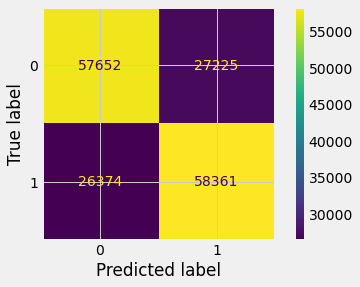

In [69]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_ros_d, y_ros_d, test_size=0.3)

# Testing Domain Features
rfc_domain = RandomForestClassifier(n_estimators = 100, max_features = 'auto', max_depth = 7, criterion = 'gini',
                              random_state = 50, verbose = 0, n_jobs = -1)

# Train on the training data
start = time.time()
rfc_domain.fit(X_train_d, y_train_d)
print("The fitting took","%0.1f" % ((time.time() - start)/60),'minutes')

# Extract feature importances
feature_importance_values_domain = rfc_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

# Make predictions on the test data
y_pred_d = rfc_domain.predict(X_test_d)

print('fbeta_score :',fbeta_score(y_test_d, y_pred_d, average='binary', beta=2))

ConfusionMatrixDisplay.from_predictions(y_test_d, y_pred_d);

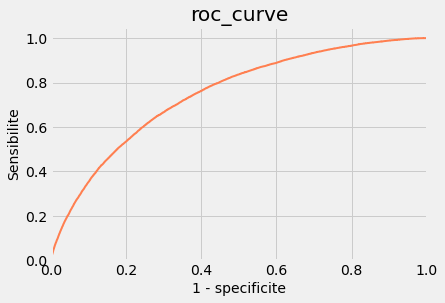

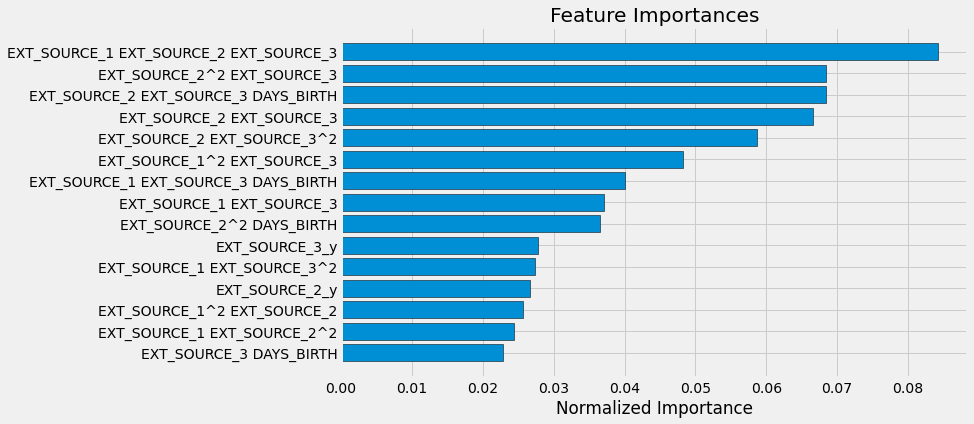

In [70]:
# Roc curve
[fpr, tpr, thr] = roc_curve(y_test_d, rfc_domain.predict_proba(X_test_d)[:,1])
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14);
plt.ylabel('Sensibilite', fontsize=14);
plt.title('roc_curve');

# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

## SMOTE : Synthetic Minority Over-sampling Technique

In [71]:
from imblearn.over_sampling import SMOTE, SMOTEN, SMOTENC
sampler = SMOTE(random_state=0)

In [72]:
# N : nominal, C : continuous
# Original features
X_res, y_res = sampler.fit_resample(train, train_labels)

# Polynomial features
X_res_p, y_res_p = sampler.fit_resample(poly_features, poly_target)

# Domain features
X_res_d, y_res_d = sampler.fit_resample(domain_features, train_labels)

### Original features

The fitting took 1.0 minutes
fbeta_score : 0.839287191425499


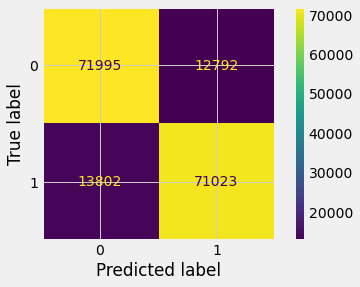

In [73]:
# Train-test split on train values
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3)

rfc = RandomForestClassifier(n_estimators = 100, max_features = 'auto', max_depth = 7, criterion = 'gini',
                              random_state = 50, verbose = 0, n_jobs = -1)

# Train on the training data
start = time.time()
rfc.fit(X_train, y_train)
print("The fitting took","%0.1f" % ((time.time() - start)/60),'minutes')

# Make predictions on the test data
y_pred = rfc.predict(X_test)

# Extract feature importances
feature_importance_values = rfc.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

print('fbeta_score :',fbeta_score(y_test, y_pred, average='binary', beta=2))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

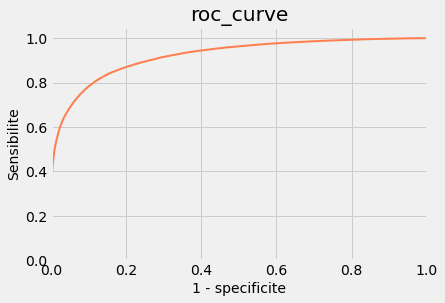

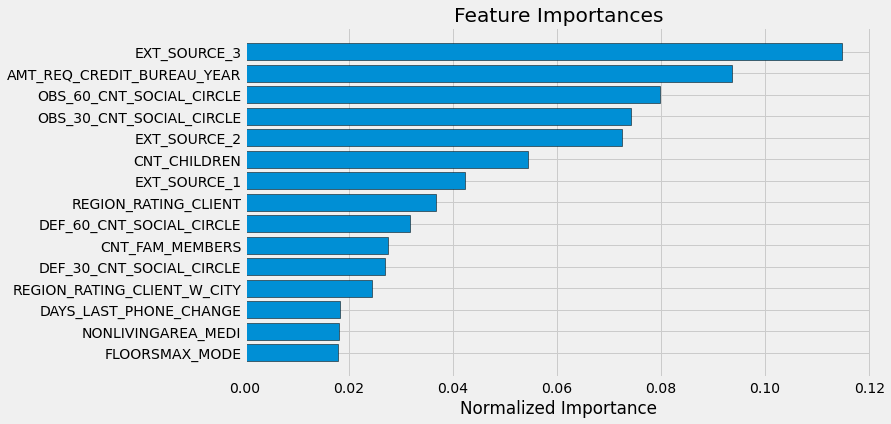

In [74]:
# Roc curve
[fpr, tpr, thr] = roc_curve(y_test, rfc.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14);
plt.ylabel('Sensibilite', fontsize=14);
plt.title('roc_curve');

# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

### Engineered features

The fitting took 1.4 minutes
fbeta_score : 0.7991417011623284


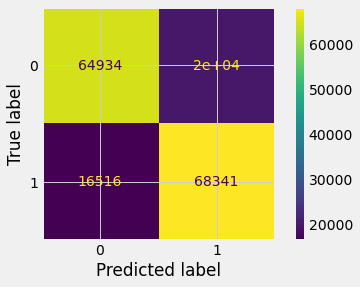

In [75]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_res_p, y_res_p, test_size=0.3)

# Make Predictions using Engineered Features
rfc_poly = RandomForestClassifier(n_estimators = 100, max_features = 'auto', max_depth = 7, criterion = 'gini',
                              random_state = 50, verbose = 0, n_jobs = -1)

# Train on the training data
start = time.time()
rfc_poly.fit(X_train_p, y_train_p)
print("The fitting took","%0.1f" % ((time.time() - start)/60),'minutes')

# Make predictions on the test data
y_pred_p = rfc_poly.predict(X_test_p)

# Extract feature importances
feature_importance_values = rfc_poly.feature_importances_
feature_importances = pd.DataFrame({'feature': app_train_poly.columns, 'importance': feature_importance_values})

print('fbeta_score :',fbeta_score(y_test_p, y_pred_p, average='binary', beta=2))

ConfusionMatrixDisplay.from_predictions(y_test_p, y_pred_p);

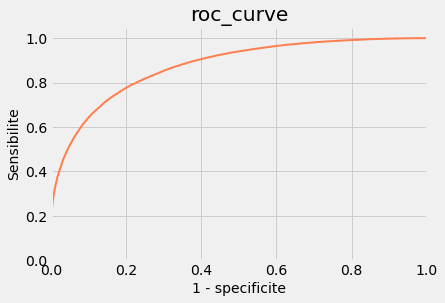

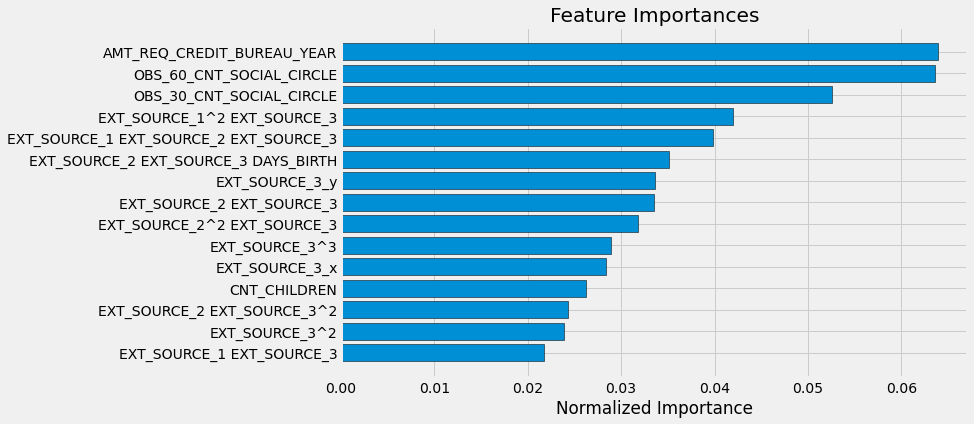

In [76]:
# Roc curve
[fpr, tpr, thr] = roc_curve(y_test_p, rfc_poly.predict_proba(X_test_p)[:,1])
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14);
plt.ylabel('Sensibilite', fontsize=14);
plt.title('roc_curve');

# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

### Testing Domain Features

The fitting took 1.3 minutes
fbeta_score : 0.8420051735746094


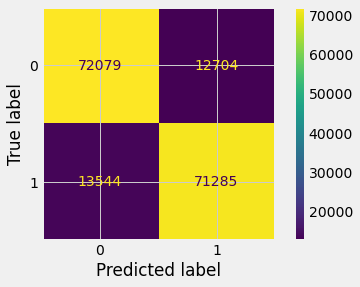

In [77]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_res_d, y_res_d, test_size=0.3)

# Testing Domain Features
rfc_domain = RandomForestClassifier(n_estimators = 100, max_features = 'auto', max_depth = 7, criterion = 'gini',
                              random_state = 50, verbose = 0, n_jobs = -1)

# Train on the training data
start = time.time()
rfc_domain.fit(X_train_d, y_train_d)
print("The fitting took","%0.1f" % ((time.time() - start)/60),'minutes')

# Extract feature importances
feature_importance_values_domain = rfc_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

# Make predictions on the test data
y_pred_d = rfc_domain.predict(X_test_d)

print('fbeta_score :',fbeta_score(y_test_d, y_pred_d, average='binary', beta=2))

ConfusionMatrixDisplay.from_predictions(y_test_d, y_pred_d);

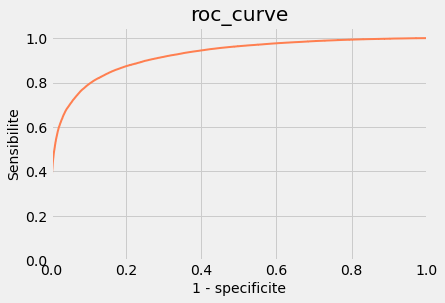

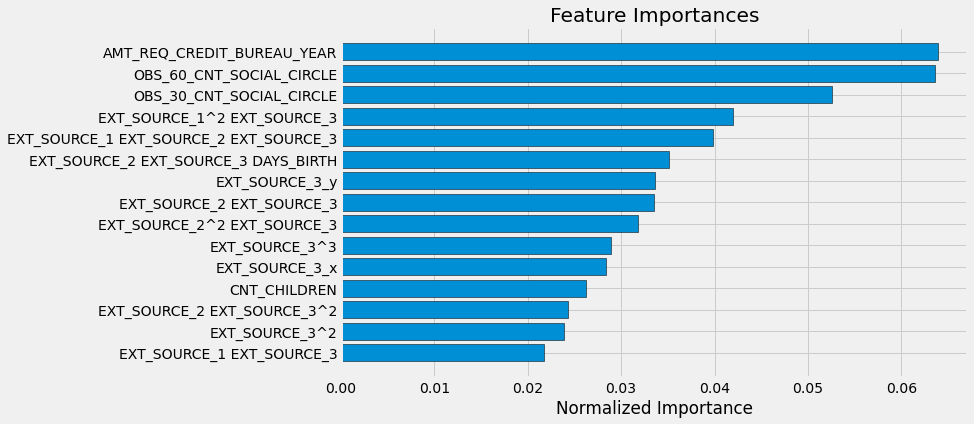

In [78]:
# Roc curve
[fpr, tpr, thr] = roc_curve(y_test_d, rfc_domain.predict_proba(X_test_d)[:,1])
plt.plot(fpr, tpr, color='coral', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - specificite', fontsize=14);
plt.ylabel('Sensibilite', fontsize=14);
plt.title('roc_curve');

# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

# Logistic regression : Class weight

## Original features

fbeta_score : 0.7167983243004613


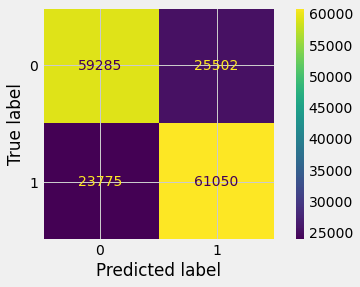

In [79]:
lrw = LogisticRegression(C=1000.0, solver='liblinear', class_weight="balanced")

lrw.fit(X_train, y_train)

y_pred = lrw.predict(X_test)

print('fbeta_score :',fbeta_score(y_test, y_pred, average='binary', beta=2))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

## Engineered features

fbeta_score : 0.7210202612555366


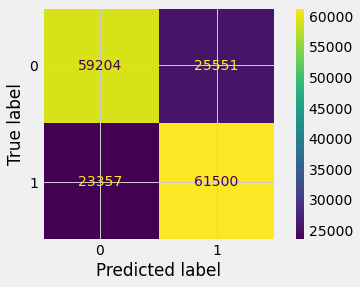

In [80]:
lrw = LogisticRegression(C=1000.0, solver='liblinear', class_weight="balanced")

lrw.fit(X_train_p, y_train_p)

y_pred_p = lrw.predict(X_test_p)

print('fbeta_score :',fbeta_score(y_test_p, y_pred_p, average='binary', beta=2))

ConfusionMatrixDisplay.from_predictions(y_test_p, y_pred_p);

## Domain Features

fbeta_score : 0.8420051735746094


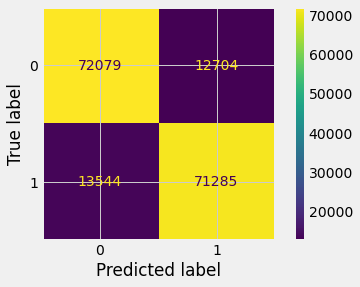

In [81]:
lrw = LogisticRegression(C=1000.0, solver='liblinear', class_weight="balanced")

lrw.fit(X_train_d, y_train_d)

y_pred_p = lrw.predict(X_test_d)

print('fbeta_score :',fbeta_score(y_test_d, y_pred_d, average='binary', beta=2))

ConfusionMatrixDisplay.from_predictions(y_test_d, y_pred_d);

# Export

In [91]:
app_train.columns.drop('TARGET') == app_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [85]:
features

Index(['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       ...
       'WALLSMATERIAL_MODE_Block', 'WALLSMATERIAL_MODE_Mixed',
       'WALLSMATERIAL_MODE_Monolithic', 'WALLSMATERIAL_MODE_Others',
       'WALLSMATERIAL_MODE_Panel', 'WALLSMATERIAL_MODE_Stone, brick',
       'WALLSMATERIAL_MODE_Wooden', 'EMERGENCYSTATE_MODE_No',
       'EMERGENCYSTATE_MODE_Yes', 'DAYS_EMPLOYED_ANOM'],
      dtype='object', length=239)

Les colonnes des données d entraînement correspondent à celles qui seront utilisées pour la prédiction dans le dashboard

## Export test

In [92]:
df_test = pd.DataFrame(test)

df_test.columns=features.tolist()

In [93]:
df_test

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,0.0,0.0,1.0,0.000000,0.000935,0.130787,0.073886,0.102132,0.257000,-1.506764,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.000000,0.000627,0.044387,0.061443,0.034792,0.491595,-1.440417,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.000000,0.001512,0.154373,0.265830,0.147026,0.260475,-1.551691,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.105263,0.002474,0.382022,0.184872,0.382716,0.361433,-1.209977,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.052632,0.001320,0.144944,0.118761,0.145903,0.134897,-1.157215,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0.0,0.0,1.0,0.000000,0.000819,0.091775,0.061846,0.057239,0.024260,-1.547858,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48740,0.0,0.0,0.0,0.105263,0.001127,0.144173,0.118147,0.113356,0.491595,-1.052706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48741,0.0,1.0,1.0,0.052632,0.001512,0.067416,0.123201,0.068462,0.361433,-1.319673,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
48742,0.0,0.0,0.0,0.000000,0.001704,0.101124,0.091699,0.102132,0.257000,-1.209526,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [94]:
pd.DataFrame(df_test).to_csv(r"C:\\Users\Jeff\Desktop\2021\Openclassroom\P7_tahiata_jeff\test.csv")

## Export model

In [95]:
filename = 'loan_model.joblib'
joblib.dump(rfc, 'loan_model.joblib')

['loan_model.joblib']

In [96]:
imputer.fit(test)
app_test_imp = imputer.transform(test)

In [97]:
model = joblib.load('loan_model.joblib')
print(model)

RandomForestClassifier(max_depth=7, n_jobs=-1, random_state=50)


In [98]:
acceptability = model.predict(app_test_imp[app_test[app_test['SK_ID_CURR'] == int(100065)].index,:])

In [99]:
probablity = model.predict_proba(app_test_imp[app_test[app_test['SK_ID_CURR'] == int(100065)].index,:])[:,1]

In [100]:
probablity

array([0.36427993])

In [101]:
print("Le programme a mis","%0.1f" % ((time.time() - start_notebook)/60),'minutes')

Le programme a mis 148.8 minutes


Dans le dashboard, charger les données nettoyés :
    
    - 1e scenario ID Client + vecteur nettoyé = interpretation avec Shap
    - 2nd scenario : statistiques générales = nuage de pts